In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, pi, sqrt
from scipy.special import gamma
from scipy.stats import chi2

def linear(x,a,b):
    return a*x+b
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

Steigung Plateaubereich (1 min): 0.000 1/Vs, Fehler 0.025 1/Vs, bzw.
   0.000 %, Fehler 0.013 % pro 100V
Steigung Plateaubereich (3 min): 0.016166666666666666 1/Vs, Fehler 0.014522332737826528 1/Vs, bzw.
   0.00855379188712522 %, Fehler 0.007716566660718159 % pro 100V


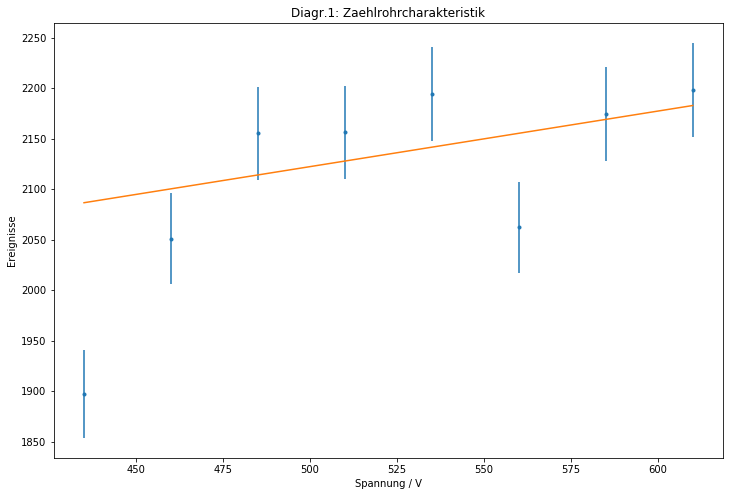

In [40]:
### Zaehlrohrspannung:
U=np.array([435,460,485,510,535,560,585,610])
#gezaehlte Ereignisse
N=np.array([1897,2051,2155,2156,2194,2062,2174,2198])
Fehler_N=np.sqrt(N)

plt.figure(1, figsize=(12,8))
popt, pcov=curve_fit(linear, U[1:], N[1:])
plt.errorbar(U, N, Fehler_N, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignisse')
plt.title('Diagr.1: Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt))
plt.savefig("figures/Zaehlrohrcharakteristik.pdf", format="pdf")

steig1=(11579-11579)/(100*60)
steig3=(34311-34020)/(100*180)
relst1=(11579-11579)/11579
relst3=(34311-34020)/34020
dsteig1=np.sqrt(11579+11579)/(100*60)
dsteig3=np.sqrt(34311+34020)/(100*180)
drelst1=(11579/11579)*np.sqrt((1/11579)+(1/11579))
drelst3=(34311/34020)*np.sqrt((1/34020)+(1/34311))
print("Steigung Plateaubereich (1 min): {:.3f} 1/Vs, Fehler {:.3f} 1/Vs, bzw.\n   {:.3f} %, Fehler {:.3f} % pro 100V"
      .format(steig1,dsteig1,relst1,drelst1))
print("Steigung Plateaubereich (3 min): {} 1/Vs, Fehler {} 1/Vs, bzw.\n   {} %, Fehler {} % pro 100V"
      .format(steig3,dsteig3,relst3,drelst3))

Gaussfit:
A= 2180.18544621 , Standardfehler= 56.4760210695
mu= 75.4519915693 , Standardfehler= 0.245073249067
sig= 8.47325065513 , Standardfehler= 0.258772794392
Poissonfit:
A_p= 2197.04876233 , Standardfehler= 51.6420022415
mu_p= 75.693475993 , Standardfehler= 0.244008817132
chi2_g= 33.567049958
chi2_red_g= 1.19882321278
chi2_p= 32.5770692999
chi2_red_p= 1.12334721724
Wahrscheinlichkeit Gauss= 22.0 %
Wahrscheinlichkeit Poisson= 30.0 %


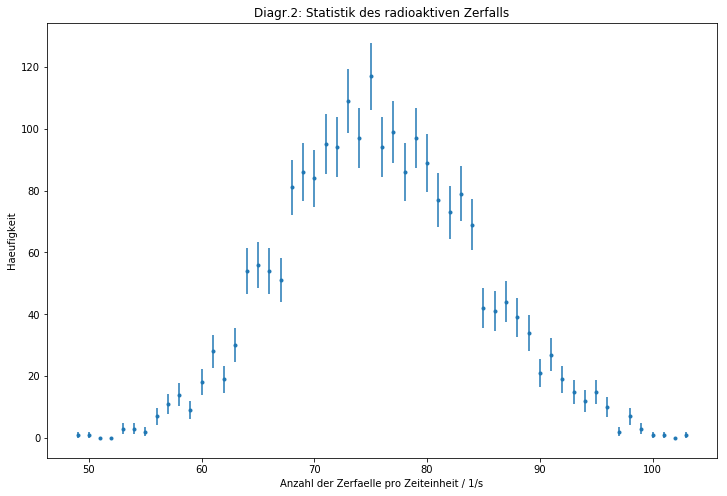

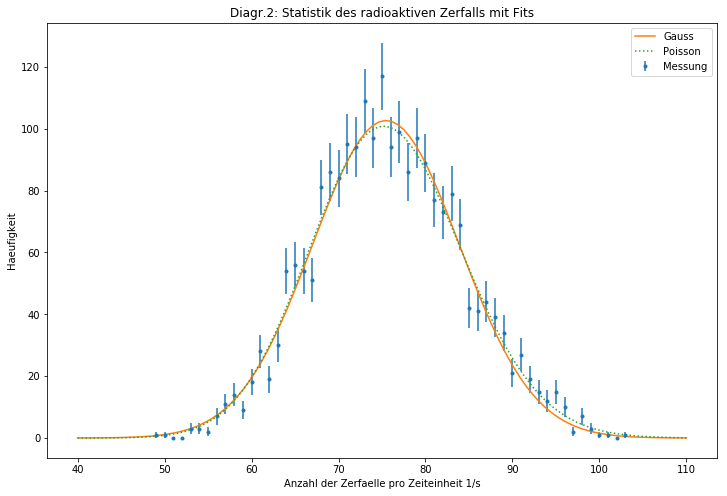

In [44]:
anzahl, haeufigkeit=np.loadtxt('data/DaniZetto1.dat', unpack=True)
fehler=np.sqrt(haeufigkeit)

plt.figure(2, figsize=(12,8))
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Diagr.2: Statistik des radioaktiven Zerfalls')

popt, pcov=curve_fit(gaussian,anzahl[12:-12], haeufigkeit[12:-12],
p0=[2000,75,8],sigma=fehler[12:-12])
popt_p, pcov_p = curve_fit(poisson, anzahl[12:-12],
haeufigkeit[12:-12], p0=[2000, 75], sigma=fehler[12:-12])

plt.figure(3, figsize=(12,8))
plt.errorbar(anzahl,haeufigkeit,fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Diagr.2: Statistik des radioaktiven Zerfalls mit Fits')
x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("figures/poisson_vs_gaussian.pdf", format="pdf")

print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))

#Gauss:
chi2_g=np.sum((gaussian(anzahl[12:-12],*popt)
-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_g=len(anzahl[12:-12])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson:
chi2_p=np.sum((poisson(anzahl[12:-12],*popt_p)
-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_p=len(anzahl[12:-12])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

Gaussfit:
A= 5423.1000117 , Standardfehler= 257.46435972
mu= 4.58724336851 , Standardfehler= 0.103044027847
sig= 2.041455317 , Standardfehler= 0.0823492945275
Poissonfit:
A_p= 5548.6103389 , Standardfehler= 71.836351032
mu_p= 4.69124909522 , Standardfehler= 0.0302476694606
chi2_g= 83.8393825401
chi2_red_g= 11.9770546486
chi2_p= 7.24481339636
chi2_red_p= 0.905601674545
Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit Poisson= 51.0 %


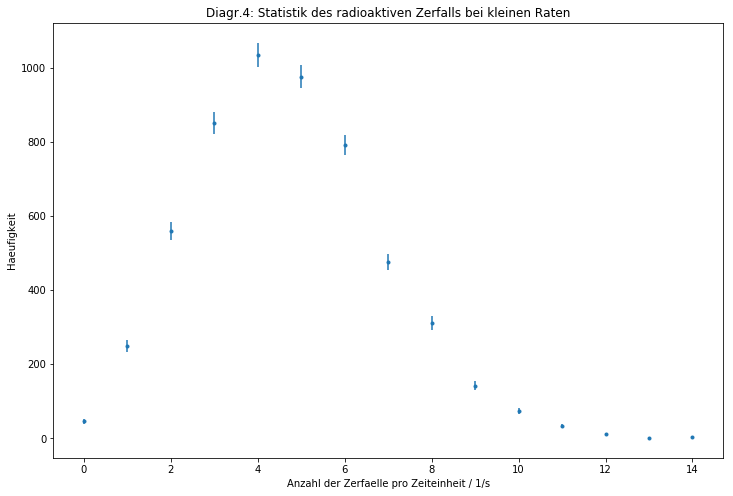

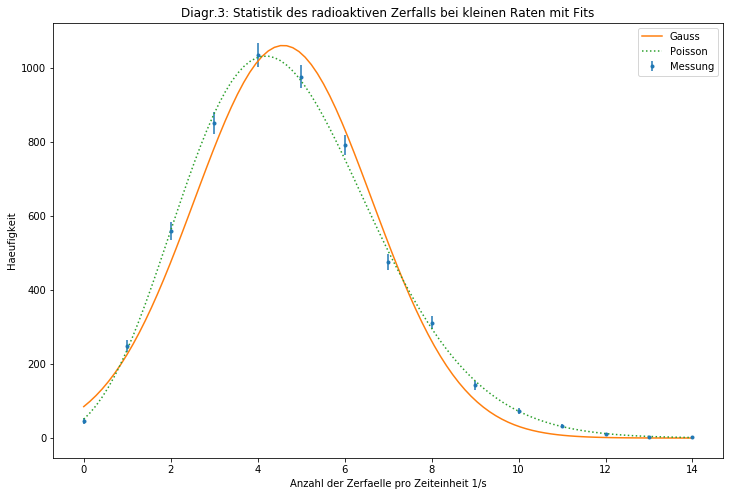

In [45]:
start2=0
end2=-5
anzahl2, haeufigkeit2=np.loadtxt('data/DaniZetto2.dat', unpack=True)
fehler2=np.sqrt(haeufigkeit2)

plt.figure(4, figsize=(12,8))
plt.errorbar(anzahl2, haeufigkeit2, fehler2, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Diagr.4: Statistik des radioaktiven Zerfalls bei kleinen Raten')

popt2, pcov2=curve_fit(gaussian,anzahl2[start2:end2], haeufigkeit2[start2:end2], 
                       p0=[1200,5,5], sigma=fehler2[start2:end2])
popt_p2, pcov_p2 = curve_fit(poisson, anzahl2[start2:end2],
                       haeufigkeit2[start2:end2], p0=[1200, 5], sigma=fehler2[start2:end2])

plt.figure(5, figsize=(12,8))
plt.errorbar(anzahl2,haeufigkeit2,fehler2, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Diagr.3: Statistik des radioaktiven Zerfalls bei kleinen Raten mit Fits')
x=np.linspace(0,14, 100)
plt.plot(x, gaussian(x,*popt2), label='Gauss')
plt.plot(x, poisson(x,*popt_p2), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("figures/poisson_vs_gaussian_low_rates.pdf", format="pdf")

print("Gaussfit:")
print("A=",popt2[0], ", Standardfehler=", np.sqrt(pcov2[0][0]))
print("mu=",popt2[1], ", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig=",popt2[2], ", Standardfehler=", np.sqrt(pcov2[2][2]))
print("Poissonfit:")
print("A_p=",popt_p2[0], ", Standardfehler=", sqrt(pcov_p2[0][0]))
print("mu_p=",popt_p2[1], ", Standardfehler=", sqrt(pcov_p2[1][1]))

#Gauss:
chi2_g2=np.sum((gaussian(anzahl2[start2:end2],*popt2)-
                haeufigkeit2[start2:end2])**2/fehler2[start2:end2]**2)
dof_g2=len(anzahl2[start2:end2])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g2=chi2_g2/dof_g2
print("chi2_g=", chi2_g2)
print("chi2_red_g=",chi2_red_g2)
#Poisson:
chi2_p2=np.sum((poisson(anzahl2[start2:end2],*popt_p2)-
                haeufigkeit2[start2:end2])**2/fehler2[start2:end2]**2)
dof_p2=len(anzahl2[start2:end2])-2 #poisson hat nur 2 Parameter
chi2_red_p2=chi2_p2/dof_p2
print("chi2_p=", chi2_p2)
print("chi2_red_p=",chi2_red_p2)

#Gauss:
prob_g2=round(1-chi2.cdf(chi2_g2,dof_g2),2)*100
#Poisson:
prob_p2=round(1-chi2.cdf(chi2_p2,dof_p2),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g2,"%")
print("Wahrscheinlichkeit Poisson=", prob_p2,"%")